In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\Owner\OneDrive - University of Bradford\Dissertation\Data\research_dataset.csv")

C:\Users\Owner\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
x =  np.array(data.iloc[:, 7:69])
y = np.array(data.iloc[:, :1])

## Train and Split

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (10, 10, 10), max_iter=1000)
model.fit(x_train, y_train.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [10]:
model.score(x_test, y_test)

0.9325396825396826

In [11]:
y_pred = model.predict(x_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 

cm = confusion_matrix(y_test, y_pred)
cm

              precision    recall  f1-score   support

         bct       0.96      0.97      0.96       564
         inv       0.82      0.85      0.83       266
         pln       0.94      0.91      0.92       505
         vrt       0.96      0.97      0.96       429

    accuracy                           0.93      1764
   macro avg       0.92      0.92      0.92      1764
weighted avg       0.93      0.93      0.93      1764

[[546   8   8   2]
 [  9 225  22  10]
 [ 11  29 460   5]
 [  2  13   0 414]]


array([[546,   8,   8,   2],
       [  9, 225,  22,  10],
       [ 11,  29, 460,   5],
       [  2,  13,   0, 414]], dtype=int64)

Text(69.0, 0.5, 'Truth')

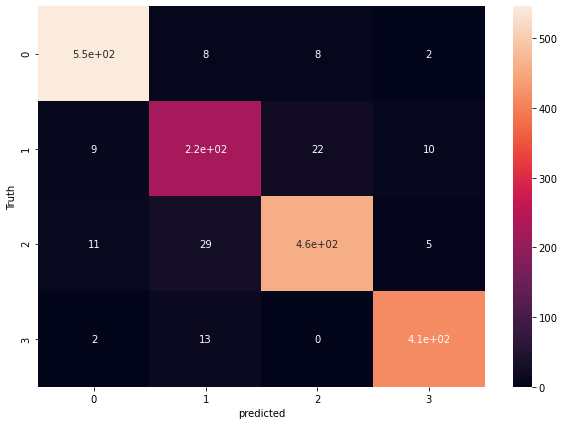

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

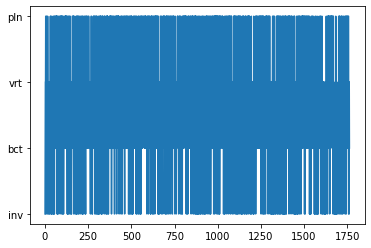

In [14]:
plt.plot(model.predict(x_test))